# Analyzing Subreddits for Ubisoft Internal Matters
In this section, we will analyze various subreddits to gather insights and discussions related to Ubisoft's internal company culture, company policies, support, customer service, and management practices. This analysis will help us understand the public perception and employee experiences associated with Ubisoft.

Subreddits focused:
<ol>
<li>gaming</li>
<li>pcgaming</li>
<li>videogames</li>
<li>Ubisoft</li>
<li>assassinscreed</li>
<li>Rainbow6</li>
<li>farcry</li>
</ol>

Keywords focused:
<ol>
<li>company culture</li>
<li>support</li>
<li>customer service</li>
<li>manage</li>
<li>employees</li>
<li>workplace</li>
<li>work environment</li>
<li>management</li>
<li>leadership</li>
<li>ethics</li>
<li>values</li>
</ol>



# Part 1: Import libraries

In [2]:
import praw
import pandas as pd
import numpy as np
import datetime as dt
import csv
import pickle   # save and load files

# topic modelling 
import re    # regular expression
import nltk     # natural language processing
from nltk.corpus import stopwords    # stop words

from wordcloud import WordCloud    # word cloud
from sklearn.feature_extraction.text import CountVectorizer    # count vectorizer       
from sklearn.decomposition import LatentDirichletAllocation as LDA # LDA   
from praw.models import MoreComments, Redditor

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

# sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# network analysis
import networkx as nx
from collections import defaultdict  

# plotting tools
import pyLDAvis     # topic modelling visualization
import pyLDAvis.lda_model   # topic modelling visualization
import seaborn as sns   # visualization
import matplotlib.pyplot as plt  # visualization
%matplotlib inline  

import os 
import sys
from dotenv import load_dotenv

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\school\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backends is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


# Part 2: Data Collection 
- Collecting data that mentions Ubisoft across the various subreddits we are trying to surf from
- Adding prerequisites for the data being collected
    - Post must be more 20 words 
    - Account must be more than 1 week old
    - Account must have more than 10 karma
    - Posts will be collected from the past 1 year

In [3]:
# bring in env variables 
load_dotenv()

CLIENT_ID = os.getenv("CLIENT_ID")
CLIENT_SECRET = os.getenv("CLIENT_SECRET")
USER_AGENT = os.getenv("USER_AGENT")
USERNAME = os.getenv("USERNAME")
PASSWORD = os.getenv("PASSWORD")

print("Env variables loaded")

Env variables loaded


In [4]:
# initialise connection with reddit
reddit = praw.Reddit(client_id=CLIENT_ID, 
                     client_secret=CLIENT_SECRET, 
                     user_agent=USER_AGENT, 
                     username=USERNAME, 
                     password=PASSWORD)

## Scrape 7 subreddits for 11 keywords related to Ubisoft internal matters

In [ ]:
total_count = 0
topic_dict = {
    "id":[],
    "author": [],
    "created": [],
    "title":[],
    "score":[],
    "comms_num": [],
    "body":[],
    "url":[]
}
subreddits = ['gaming', 'pcgaming', 'videogames', 'Ubisoft', 'assassinscreed', 'Rainbow6', 'farcry']

# Define the keywords you want to search for
keywords = ['company culture', 'support', 'customer service', 'manage', 'employees', 'workplace', 'work environment', 'management', 'leadership', 'ethics', 'values']

# Loop over each subreddit
for subreddit_name in subreddits:
    subreddit = reddit.subreddit(subreddit_name)
    print(f"##### Searching subreddit: {subreddit_name} #####")
    
    # Loop over each keyword
    for keyword in keywords:
        print(f"##### Searching for posts mentioning: '{keyword}' and 'Ubisoft' #####")
        post_count = 0

        for submission in subreddit.search(keyword, limit=1000, sort='top'):
            # Check if 'Ubisoft' is mentioned in the title or body of the post
            if 'ubisoft' in submission.title.lower() or 'ubisoft' in submission.selftext.lower():
                
                # Add the post to the dictionary
                topic_dict["id"].append(submission.id)
                topic_dict["author"].append(submission.author)
                topic_dict["created"].append(submission.created)
                topic_dict["title"].append(submission.title)
                topic_dict["score"].append(submission.score)
                topic_dict["comms_num"].append(submission.num_comments)
                topic_dict["body"].append(submission.selftext)
                topic_dict["url"].append(submission.url)

                post_count += 1
                total_count += 1
                print(f"Added {post_count} post mentioning keyword {keyword}" )

print("Data collection complete.There are a total of ", total_count, " posts collected.")

##### Searching subreddit: gaming #####
##### Searching for posts mentioning: 'company culture' and 'Ubisoft' #####
Added 1 post mentioning keyword company culture
Added 2 post mentioning keyword company culture
Added 3 post mentioning keyword company culture
Added 4 post mentioning keyword company culture
Added 5 post mentioning keyword company culture
Added 6 post mentioning keyword company culture
Added 7 post mentioning keyword company culture
Added 8 post mentioning keyword company culture
Added 9 post mentioning keyword company culture
Added 10 post mentioning keyword company culture
Added 11 post mentioning keyword company culture
Added 12 post mentioning keyword company culture
Added 13 post mentioning keyword company culture
Added 14 post mentioning keyword company culture
##### Searching for posts mentioning: 'support' and 'Ubisoft' #####
Added 1 post mentioning keyword support
Added 2 post mentioning keyword support
Added 3 post mentioning keyword support
Added 4 post mentio

In [6]:
submission_posts = pd.DataFrame(topic_dict)  
submission_posts

id           author       created  \
0      9tyqnu        deflaimun  1.541287e+09   
1      19vmt7         xylotism  1.362700e+09   
2      6knp0r    Dudeman_Jones  1.498924e+09   
3      gv9n9n           zeoxzy  1.591113e+09   
4      1gbpvv          Hamakua  1.371194e+09   
...       ...              ...           ...   
2345   usfei3  BeardInTheNorth  1.652887e+09   
2346   87z5b3           yeew21  1.522306e+09   
2347   q57hym      JosephStall  1.633870e+09   
2348   48j4jc           InVizO  1.456873e+09   
2349  1eiyini      RioluButGun  1.722675e+09   

                                                  title  score  comms_num  \
0      China is re-shaping entertainment as we know it.     15          7   
1     SimCity 5 a disappointment, gamers have had it...      9         11   
2        Victory Lap: E3 from the eyes of a first timer      9          4   
3                                  Game company profits      5          3   
4     DRM and Microsoft's Xbox One (Undisclosed) int...      6         12   
...                                                 ...    ...        ...   
2345  Far Cry Anthology bundle is on sale for $50 ag...      0          1   
2346  It shouldn't be too hard to patch the enemy re...      0         10   
2347                     Ubisoft has a creative problem      0         35   
2348                    Even at $0 Game is not Worth It      0          6   
2349  Hot Take: Far Cry 5 is extremely overrated and...      0         31   

                                                   body  \
0     Companies are changing their IPs in every way ...   
1     Quoted from Metacritic user OrcTownOrc:\n\n>EA...   
2     The following article is a travelogue based on...   
3     Hi guys, this is more of a brain dump and unli...   
4     * If Microsoft is trying to adopt Steam's Busi...   
...                                                 ...   
2345  $50 for Far Cry 3C, 4, 5, and 6 seems like a g...   
2346  Just change the value. Until then I will not b...   
2347  For anyone that’s played Ubisoft games in the ...   
2348  I'm a pretty upset Farcry fan right now.\n\nI ...   
2349  This is going to be a little bit of a rant but...   

                                                    url  
0     https://www.reddit.com/r/gaming/comments/9tyqn...  
1     https://www.reddit.com/r/gaming/comments/19vmt...  
2     https://www.reddit.com/r/gaming/comments/6knp0...  
3     https://www.reddit.com/r/gaming/comments/gv9n9...  
4     https://www.reddit.com/r/gaming/comments/1gbpv...  
...                                                 ...  
2345  https://www.reddit.com/r/farcry/comments/usfei...  
2346  https://www.reddit.com/r/farcry/comments/87z5b...  
2347  https://www.reddit.com/r/farcry/comments/q57hy...  
2348  https://www.reddit.com/r/farcry/comments/48j4j...  
2349  https://www.reddit.com/r/farcry/comments/1eiyi...  

[2350 rows x 8 columns]

In [38]:
# Filter the DataFrame to drop rows where comms_num is below 10
engaging_submission_posts = submission_posts[submission_posts['comms_num'] >= 10]

# Display the updated DataFrame
engaging_submission_posts

id           author       created  \
1      19vmt7         xylotism  1.362700e+09   
4      1gbpvv          Hamakua  1.371194e+09   
5      k3bcr2         Vitaro99  1.606664e+09   
6      i9stov        YourQuirk  1.597434e+09   
10     nszwpt  Voidbearer2kn17  1.622912e+09   
...       ...              ...           ...   
2333   2nlg3u       shaggyzon4  1.417111e+09   
2335   8ar8j8      MiksteR_RdY  1.523207e+09   
2346   87z5b3           yeew21  1.522306e+09   
2347   q57hym      JosephStall  1.633870e+09   
2349  1eiyini      RioluButGun  1.722675e+09   

                                                  title  score  comms_num  \
1     SimCity 5 a disappointment, gamers have had it...      9         11   
4     DRM and Microsoft's Xbox One (Undisclosed) int...      6         12   
5     I noticed that AAA games are not quite popular...      5         13   
6     What companies do we know are really shitty to...      4         48   
10                Shattering the illusion of AAA gaming      0         23   
...                                                 ...    ...        ...   
2333  The Good, the Bad and some stuff that could be...      3         10   
2335  How Far Cry 5 is not the optimized game the be...      4         15   
2346  It shouldn't be too hard to patch the enemy re...      0         10   
2347                     Ubisoft has a creative problem      0         35   
2349  Hot Take: Far Cry 5 is extremely overrated and...      0         31   

                                                   body  \
1     Quoted from Metacritic user OrcTownOrc:\n\n>EA...   
4     * If Microsoft is trying to adopt Steam's Busi...   
5     As a russian I want to share with you my exper...   
6     (This is a post about real life **workplace cu...   
10    I have noticed that the 'quality' of AAA gamin...   
...                                                 ...   
2333  Put together my list of critiques for FC4. As ...   
2335  So I'm running:\n\n- GTX 1080 AMP!\n- i7 6700k...   
2346  Just change the value. Until then I will not b...   
2347  For anyone that’s played Ubisoft games in the ...   
2349  This is going to be a little bit of a rant but...   

                                                    url  
1     https://www.reddit.com/r/gaming/comments/19vmt...  
4     https://www.reddit.com/r/gaming/comments/1gbpv...  
5     https://www.reddit.com/r/gaming/comments/k3bcr...  
6     https://www.reddit.com/r/gaming/comments/i9sto...  
10    https://www.reddit.com/r/gaming/comments/nszwp...  
...                                                 ...  
2333  https://www.reddit.com/r/farcry/comments/2nlg3...  
2335  https://www.reddit.com/r/farcry/comments/8ar8j...  
2346  https://www.reddit.com/r/farcry/comments/87z5b...  
2347  https://www.reddit.com/r/farcry/comments/q57hy...  
2349  https://www.reddit.com/r/farcry/comments/1eiyi...  

[1414 rows x 8 columns]

In [39]:
# Arrange the engaging_submission_posts by the number of comments in descending order
engaging_submission_posts_sorted = engaging_submission_posts.sort_values(by='comms_num', ascending=False)

# Display the sorted DataFrame
engaging_submission_posts_sorted

id              author       created  \
924    jr6gvi   WhiteWolfWhispers  1.604956e+09   
1202   jr6gvi   WhiteWolfWhispers  1.604956e+09   
69     6pmx25   LinksGayAwakening  1.501061e+09   
980    jqzgf3      Ghost_LeaderBG  1.604935e+09   
20     8pvcna             Loffeno  1.528574e+09   
...       ...                 ...           ...   
872   1d8lqf5           Alberttth  1.717580e+09   
1657   as0rd6         Grey_Ferret  1.550517e+09   
2300   qkozlw           Redfoo357  1.635804e+09   
1747   4dlevl              Trivvy  1.459944e+09   
1759   51iarg  SirBostonTBagParty  1.473206e+09   

                                                  title  score  comms_num  \
924   Assassin's Creed Valhalla General Discussion [...    643      10335   
1202  Assassin's Creed Valhalla General Discussion [...    640      10335   
69    Do you play Playerunknown's Battlegrounds? JUS...  24382       3154   
980   Assassin's Creed Valhalla Tech Support Megathread    145       2676   
20                        EA's E3 Conference Break Down  27300       2394   
...                                                 ...    ...        ...   
872         My Ubisoft account got banned for no reason      0         10   
1657  Feedback on horrible design/customization options      0         10   
2300  So Dani is the most human far cry protagonist,...      3         10   
1747              Subreddit Suggestion - "Ubi Response"     29         10   
1759  Ubisoft my Frame Time Since The 4.1 Patch Has ...     10         10   

                                                   body  \
924   It's time for the release of Assassin's Creed ...   
1202  It's time for the release of Assassin's Creed ...   
69    #**EDIT:**\n\nAnyone who uses the tweeter, can...   
980   As with any video game, after the launch of As...   
20    **EA's E3 Conference June 9th, 2018**\n\n**BFV...   
...                                                 ...   
872   I got banned a week ago because apparently Ubi...   
1657  Hello.\n\nFirst of all, I want to point out, t...   
2300  It feels almost in character for Dani to turn ...   
1747  I think it would be useful to know whether an ...   
1759  [This is unplayable.](http://imgur.com/a/2vdWu...   

                                                    url  
924   https://www.reddit.com/r/assassinscreed/commen...  
1202  https://www.reddit.com/r/assassinscreed/commen...  
69    https://www.reddit.com/r/pcgaming/comments/6pm...  
980   https://www.reddit.com/r/assassinscreed/commen...  
20    https://www.reddit.com/r/gaming/comments/8pvcn...  
...                                                 ...  
872   https://www.reddit.com/r/ubisoft/comments/1d8l...  
1657  https://www.reddit.com/r/Rainbow6/comments/as0...  
2300  https://www.reddit.com/r/farcry/comments/qkozl...  
1747  https://www.reddit.com/r/Rainbow6/comments/4dl...  
1759  https://www.reddit.com/r/Rainbow6/comments/51i...  

[1414 rows x 8 columns]

In [40]:
'''
Fixing the date column

Reddit uses UNIX timestamps to format date and time. 
Instead of manually converting all those entries, or using a site like 
www.unixtimestamp.com, we can easily write up a function in Python to automate that process.

We define it, call it, and join the new column to dataset with the following code:
'''

def get_date(created):
    return dt.datetime.fromtimestamp(created)

_timestamp = engaging_submission_posts["created"].apply(get_date)

engaging_submission_posts = engaging_submission_posts.assign(timestamp = _timestamp)

In [41]:
# save posts to csv
engaging_submission_posts.to_csv('reddit_ubisoft_internal_posts.csv', index=False)

In [42]:
# Convert the dataframe back into a dictionary
engaging_submission_posts_dict = engaging_submission_posts.to_dict(orient='list')
print(engaging_submission_posts_dict)

{'id': ['19vmt7', '1gbpvv', 'k3bcr2', 'i9stov', 'nszwpt', 'ox9hrf', 'sx4slf', '1fsbl57', '19cy9vf', '8q686s', '8qkjil', 'wg71g', 'wi985', '8pvcna', '7a5ijr', 'ir5z9', 'jnd02', 'bfz6a', 'zexgk', '1aezbo', '2tlejw', 'wlhkl', '7i6k47', '87t8oi', 'w1sbie', '8qeby3', '1fpt84x', '1dqw6kn', '9am3b', '1aedem', 'i9stov', 'uejjks', 'r7gc4h', 'q3hm53', 'oucmva', 'ox9hrf', 'jnd02', '4ycpfq', 'w5i6ke', 'q1opx2', 'w1sbie', '8qeby3', '1fpt84x', '2jt5k4', '18xpq41', 'b3lav', '7cscli', '622z4a', '164lfei', '192ovim', 'nm1kgg', '29fl0x', '140qajt', 'be88c0', '6pmx25', 'b3g0ne', 'bcbaoj', 'jtadjs', 'jlhg3l', 'co7pby', 'nm1kgg', 'aaiore', '7atzyr', 'avu5ob', '5pbfpv', '4shvju', '163pdgc', 'nyfej3', 'co7pby', 'aaiore', 'mqgagt', '20hx3k', 'bcbaoj', 'co7pby', 'wab595', '13dttdr', '7fnpay', 'gu9cpo', '20hx3k', '171j11a', '9mqb1m', '10eiv3h', '1gbu969', 'rivx7m', '1drczzm', 'sq4vxs', 'rl2qsf', '17q5v3q', 'bhbbmh', '7uce9w', 'kh8mab', '7unski', '5m9um2', '87ufkf', 'qbu0hw', 'bcbaoj', 'co7pby', 'wab595', '13dtt

In [47]:
# checking frequency of author posting
author_counts = engaging_submission_posts['author'].value_counts()
author_counts.head(30)

author
Ghost_LeaderBG          33
LordKeren               31
domvgt                  31
nstav13                 30
jeypiti                 27
VestigialLlama4         25
Kentukkis               12
Turul9                  11
ChankaNewsNetwork       10
iwascuddles              9
WhiteWolfWhispers        9
Turbostrider27           7
FinnsterMac              6
Comprehensive_Part42     6
MrFriendism              6
Ahmed_Anubis             6
0K4M1                    6
Lord_Antheron            6
RinoTheBouncer           6
Darth_Samuel             5
Aftermath1231            5
ReportPlayer             5
Loffeno                  5
SparkedSynapse           4
PePe_0_5aP0              4
PTBR                     4
englishbutter            4
bigbadboy333             4
N3mus                    4
Shit_Post_Detective      4
Name: count, dtype: int64

In [49]:
# Convert Redditor objects to their usernames
engaging_submission_posts['author'] = engaging_submission_posts['author'].apply(lambda x: x.name if isinstance(x, Redditor) else x)

# Filter authors with more than 4 counts
authors_with_more_than_4_counts = author_counts[author_counts > 4].index

# Filter posts by authors with more than 4 counts
filtered_posts = engaging_submission_posts[engaging_submission_posts['author'].isin(authors_with_more_than_4_counts)]

# Group by author and calculate the total sum of comms_num
author_comms_sum = filtered_posts.groupby('author')['comms_num'].sum().reset_index()

# Rename the columns for clarity
author_comms_sum.columns = ['author', 'total_comms_num']

author_comms_sum.sort_values('total_comms_num', ascending=False, inplace=True)

author_comms_sum

author  total_comms_num
18     WhiteWolfWhispers            22213
19                domvgt            17995
7         Ghost_LeaderBG            17437
21               jeypiti             9258
10             LordKeren             6712
9                Loffeno             4767
22               nstav13             2547
16                Turul9             1454
15        Turbostrider27             1436
11         Lord_Antheron             1281
3      ChankaNewsNetwork             1204
17       VestigialLlama4              978
13          ReportPlayer              825
12           MrFriendism              732
20           iwascuddles              517
14        RinoTheBouncer              513
6            FinnsterMac              492
5           Darth_Samuel              465
1          Aftermath1231              447
8              Kentukkis              406
4   Comprehensive_Part42              222
2           Ahmed_Anubis              176
0                  0K4M1              114

## Scrape comments under 1414 posts

In [ ]:
import time
from prawcore.exceptions import NotFound, TooManyRequests

# Initialize a dictionary to store comments
comments_dict = {
    "post_id": [],
    "comment_id": [],
    "author": [],
    "created": [],
    "body": [],
    "score": []
}

# Loop through each post to get comments
for post_id in engaging_submission_posts_dict["id"]:
    try:
        submission = reddit.submission(id=post_id)      # Get the post
        submission.comments.replace_more(limit=100)    # Get top 100 comments

        for comment in submission.comments.list():
            comments_dict["post_id"].append(post_id)
            comments_dict["comment_id"].append(comment.id)
            comments_dict["author"].append(comment.author)
            comments_dict["created"].append(comment.created)
            comments_dict["body"].append(comment.body)
            comments_dict["score"].append(comment.score)
    
    # Add a delay to avoid hitting the rate limit
        time.sleep(2)  # Adjust the delay as needed
    except NotFound:
        print(f"Post with ID {post_id} not found. Skipping...")
    except TooManyRequests:
        print("Rate limit exceeded. Waiting for 60 seconds...")
        time.sleep(60)  # Wait for 60 seconds before retrying

In [ ]:
# Create a DataFrame from the comments dictionary
comments_data = pd.DataFrame(comments_dict)
comments_data

post_id comment_id         author       created  \
0        19vmt7    c8rp089       xylotism  1.362701e+09   
1        19vmt7    c8rpasf           None  1.362702e+09   
2        19vmt7    c8rr3rv           None  1.362707e+09   
3        19vmt7    c8rvihx     Geoffvster  1.362721e+09   
4        19vmt7    c8rpjsq       xylotism  1.362702e+09   
...         ...        ...            ...           ...   
222108  1eiyini    lg9xxpr           None  1.722677e+09   
222109  1eiyini    lgbqktz          wrel_  1.722705e+09   
222110  1eiyini    lgbr6b7  Lord_Antheron  1.722705e+09   
222111  1eiyini    lgbsql8          wrel_  1.722706e+09   
222112  1eiyini    lgbsuyc  Lord_Antheron  1.722706e+09   

                                                     body  score  
0       TL;DR -- This review from Jonathan Cresswell a...      2  
1       Until people stop buying their products, it wi...      2  
2       EA's entire MO has been rather distasteful for...      1  
3       I agree with everything you've said, but I hop...      0  
4       I like how they recently "reworded" their "all...      1  
...                                                   ...    ...  
222108                                          [removed]      2  
222109  >“Large minority” is an oxymoron.\n\nNo it isn...      1  
222110  ~~Really, that’s the only part you focused on?...      2  
222111  It's the part I focused on because it was my p...      0  
222112                          … Okay that’s a fair cop.      2  

[222113 rows x 6 columns]

In [25]:
# Drop rows where author is None
filtered_comments_data = comments_data.dropna(subset=['author'])

# Display the filtered DataFrame
filtered_comments_data

post_id comment_id         author       created  \
0        19vmt7    c8rp089       xylotism  1.362701e+09   
3        19vmt7    c8rvihx     Geoffvster  1.362721e+09   
4        19vmt7    c8rpjsq       xylotism  1.362702e+09   
8        19vmt7    c8rxx0m        Jimm607  1.362734e+09   
9        19vmt7    c8rppw4       xylotism  1.362703e+09   
...         ...        ...            ...           ...   
222107  1eiyini    lgbop55  Lord_Antheron  1.722705e+09   
222109  1eiyini    lgbqktz          wrel_  1.722705e+09   
222110  1eiyini    lgbr6b7  Lord_Antheron  1.722705e+09   
222111  1eiyini    lgbsql8          wrel_  1.722706e+09   
222112  1eiyini    lgbsuyc  Lord_Antheron  1.722706e+09   

                                                     body  score  
0       TL;DR -- This review from Jonathan Cresswell a...      2  
3       I agree with everything you've said, but I hop...      0  
4       I like how they recently "reworded" their "all...      1  
8       What theyve done with maxis in general makes m...      1  
9       I absolutely love the new Tomb Raider game tha...      1  
...                                                   ...    ...  
222107  “Large minority” is an oxymoron. The last post...      3  
222109  >“Large minority” is an oxymoron.\n\nNo it isn...      1  
222110  ~~Really, that’s the only part you focused on?...      2  
222111  It's the part I focused on because it was my p...      0  
222112                          … Okay that’s a fair cop.      2  

[190425 rows x 6 columns]

In [26]:
# Sort the comments_data DataFrame by score in descending order
sorted_comments_data = filtered_comments_data.sort_values(by='score', ascending=False)

# Display the top 50 comments
sorted_comments_data

post_id comment_id           author       created  \
170     1fsbl57    lpjal28   Strategist9101  1.727637e+09   
169     1fsbl57    lpjbqxy    Every-Slice59  1.727637e+09   
7147     8pvcna    e0ec173         Skinnder  1.528575e+09   
8007     8pvcna    e0ec6tb          Loffeno  1.528575e+09   
7146     8pvcna    e0edvba  OmegamattReally  1.528577e+09   
...         ...        ...              ...           ...   
164297  1877bd1    kbdb79y       XenoDrobot  1.701323e+09   
163866   6q9zgo    dkvujiu    CephalonVezir  1.501334e+09   
67194   1ea3e9m    lej224m       SamMerlini  1.721735e+09   
138452  1ea3e9m    lej224m       SamMerlini  1.721735e+09   
164215  1877bd1    kbcoj1u       XenoDrobot  1.701312e+09   

                                                     body  score  
170     Even the Ubisoft launcher can't believe you'd ...  14313  
169     Back when I bought FarCry3  Uplay didn't want ...   9959  
7147    Are you also planning on doing the same for Be...   9153  
8007    I want to try and do this for all the conferen...   9019  
7146    >New Command & Conquer title\n\n\*starts hyper...   6961  
...                                                   ...    ...  
164297  > siege has one of the quickest battle passes ...   -151  
163866  Jesus christ really? Fucking hell I thought th...   -183  
67194   Japanese people are angry about Lockley's atte...   -276  
138452  Japanese people are angry about Lockley's atte...   -279  
164215  especially since Siege’s battlepass takes *for...   -326  

[190425 rows x 6 columns]

In [32]:
# Check for duplicates in the comment_id column
duplicate_comment_ids = sorted_comments_data[sorted_comments_data.duplicated('comment_id', keep=False)]

# Display the number of duplicate comment_ids
num_duplicates = duplicate_comment_ids.shape[0]
print(f"Number of duplicate comment_ids: {num_duplicates}")

# Display the duplicate comment_ids
duplicate_comment_ids

Number of duplicate comment_ids: 98072


post_id comment_id             author       created  \
10154    w1sbie    igmpk2d  KennyImmortalized  1.658144e+09   
12723    w1sbie    igmpk2d  KennyImmortalized  1.658144e+09   
33580    aaiore    ecshtoq      QuackChampion  1.546071e+09   
29336    aaiore    ecshtoq      QuackChampion  1.546071e+09   
41794    co7pby    ewgmsbn   LongFluffyDragon  1.565385e+09   
...         ...        ...                ...           ...   
17090    nm1kgg    gzm3xxt         daviejambo  1.622103e+09   
29228    nm1kgg    gzm69jx         daviejambo  1.622105e+09   
17201    nm1kgg    gzm69jx         daviejambo  1.622105e+09   
67194   1ea3e9m    lej224m         SamMerlini  1.721735e+09   
138452  1ea3e9m    lej224m         SamMerlini  1.721735e+09   

                                                     body  score  
10154   But proceeds to do messed up things to their f...   4871  
12723   But proceeds to do messed up things to their f...   4871  
33580   I'm glad he's addressing the point about Epic'...   2824  
29336   I'm glad he's addressing the point about Epic'...   2822  
41794   >  I received this message from one of the mod...   2353  
...                                                   ...    ...  
17090   Just don't buy their games then ? \n\nI don't ...    -72  
29228   No but you can steal an iphone , just like how...    -73  
17201   No but you can steal an iphone , just like how...    -76  
67194   Japanese people are angry about Lockley's atte...   -276  
138452  Japanese people are angry about Lockley's atte...   -279  

[98072 rows x 6 columns]

In [34]:
# Drop duplicate comment_id and keep only the first occurrence
unique_comments = sorted_comments_data.drop_duplicates(subset='comment_id', keep='first')

# Display the updated DataFrame
unique_comments

post_id comment_id           author       created  \
170     1fsbl57    lpjal28   Strategist9101  1.727637e+09   
169     1fsbl57    lpjbqxy    Every-Slice59  1.727637e+09   
7147     8pvcna    e0ec173         Skinnder  1.528575e+09   
8007     8pvcna    e0ec6tb          Loffeno  1.528575e+09   
7146     8pvcna    e0edvba  OmegamattReally  1.528577e+09   
...         ...        ...              ...           ...   
153834   y4rsce    isghpt5        BetaFuchs  1.665865e+09   
164297  1877bd1    kbdb79y       XenoDrobot  1.701323e+09   
163866   6q9zgo    dkvujiu    CephalonVezir  1.501334e+09   
67194   1ea3e9m    lej224m       SamMerlini  1.721735e+09   
164215  1877bd1    kbcoj1u       XenoDrobot  1.701312e+09   

                                                     body  score  
170     Even the Ubisoft launcher can't believe you'd ...  14313  
169     Back when I bought FarCry3  Uplay didn't want ...   9959  
7147    Are you also planning on doing the same for Be...   9153  
8007    I want to try and do this for all the conferen...   9019  
7146    >New Command & Conquer title\n\n\*starts hyper...   6961  
...                                                   ...    ...  
153834  It doesn't really help if you have to ban some...   -108  
164297  > siege has one of the quickest battle passes ...   -151  
163866  Jesus christ really? Fucking hell I thought th...   -183  
67194   Japanese people are angry about Lockley's atte...   -276  
164215  especially since Siege’s battlepass takes *for...   -326  

[135922 rows x 6 columns]

# Part 3: Topic Modelling

In [50]:
# data pre-processing

# remove columns that are not needed
engaging_submission_posts = engaging_submission_posts.drop(columns=['id', 'author', 'created', 'score', 'comms_num', 'url', 'timestamp'])

# remove rows with empty body
engaging_submission_posts = engaging_submission_posts[engaging_submission_posts['body'] != '']

# remove rows with empty title
engaging_submission_posts = engaging_submission_posts[engaging_submission_posts['title'] != '']

# remove punctuation
engaging_submission_posts['body'] = engaging_submission_posts['body'].map(lambda x: re.sub('[,\.!?*]', '', x))
engaging_submission_posts['title'] = engaging_submission_posts['title'].map(lambda x: re.sub('[,\.!?*]', '', x))

# convert to lowercase
engaging_submission_posts['body'] = engaging_submission_posts['body'].map(lambda x: x.lower())
engaging_submission_posts['title'] = engaging_submission_posts['title'].map(lambda x: x.lower())


<>:13: DeprecationWarning: invalid escape sequence '\.'
<>:14: DeprecationWarning: invalid escape sequence '\.'
<>:13: DeprecationWarning: invalid escape sequence '\.'
<>:14: DeprecationWarning: invalid escape sequence '\.'
C:\Users\school\AppData\Local\Temp\ipykernel_12936\2695029488.py:13: DeprecationWarning: invalid escape sequence '\.'
  engaging_submission_posts['body'] = engaging_submission_posts['body'].map(lambda x: re.sub('[,\.!?*]', '', x))
C:\Users\school\AppData\Local\Temp\ipykernel_12936\2695029488.py:14: DeprecationWarning: invalid escape sequence '\.'
  engaging_submission_posts['title'] = engaging_submission_posts['title'].map(lambda x: re.sub('[,\.!?*]', '', x))


In [36]:
from nltk.stem import PorterStemmer
from nltk import pos_tag, word_tokenize

# Initialize the stemmer
stemmer = PorterStemmer()

# Function to stem and filter words based on POS tagging
def stem_and_filter(text):
    # Tokenize the text
    words = word_tokenize(text)
    
    # Perform POS tagging
    pos_tags = pos_tag(words)
    
    # Filter words that are not nouns, adjectives, or proper nouns
    filtered_words = [word for word, pos in pos_tags if pos in ['NN', 'NNS', 'NNP', 'NNPS', 'JJ', 'JJR', 'JJS']]
    
    # Stem the filtered words
    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    
    return ' '.join(stemmed_words)

# Apply the function to the 'body' column
engaging_submission_posts['filtered_body'] = engaging_submission_posts['body'].apply(stem_and_filter)

# Display the updated dataframe
engaging_submission_posts.head()

title  \
1   simcity 5 a disappointment gamers have had it ...   
4   drm and microsoft's xbox one (undisclosed) int...   
5   i noticed that aaa games are not quite popular...   
6   what companies do we know are really shitty to...   
10              shattering the illusion of aaa gaming   

                                                 body  \
1   quoted from metacritic user orctownorc:\n\n>ea...   
4   * if microsoft is trying to adopt steam's busi...   
5   as a russian i want to share with you my exper...   
6   (this is a post about real life **workplace cu...   
10  i have noticed that the 'quality' of aaa gamin...   

                                        filtered_body  
1   metacrit user orctownorc > ea busi own busi ot...  
4   * microsoft steam busi model gamer * gamer dow...  
5   russian i share experi i kid mario kart zelda ...  
6   post real life * * workplac cultur * * * * tre...  
10  i 'qualiti aaa game sharp turn custom percept ...

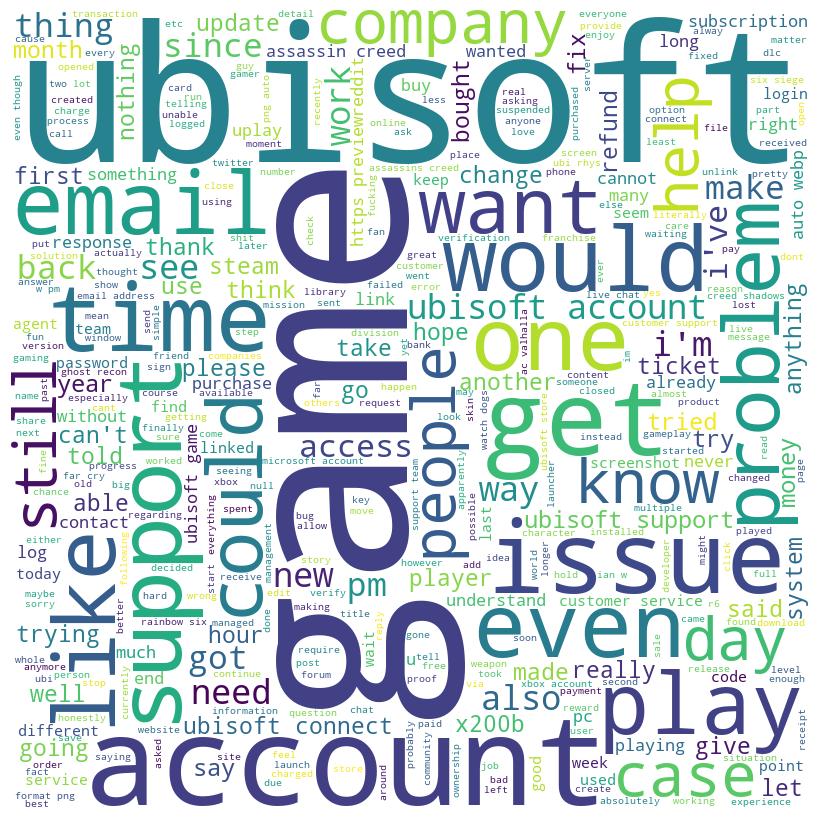

In [ ]:
# word cloud 

# join all the text in the body column
text = ' '.join(engaging_submission_posts['body'])

# create a word cloud object
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words = 1000,
                contour_width = 3, 
                contour_color = 'steelblue',
                stopwords = set(stopwords.words('english')), 
                min_font_size = 10).generate(text)  

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# visuazlize the word cloud
wordcloud.to_file('wordcloud_internal_matters.png')


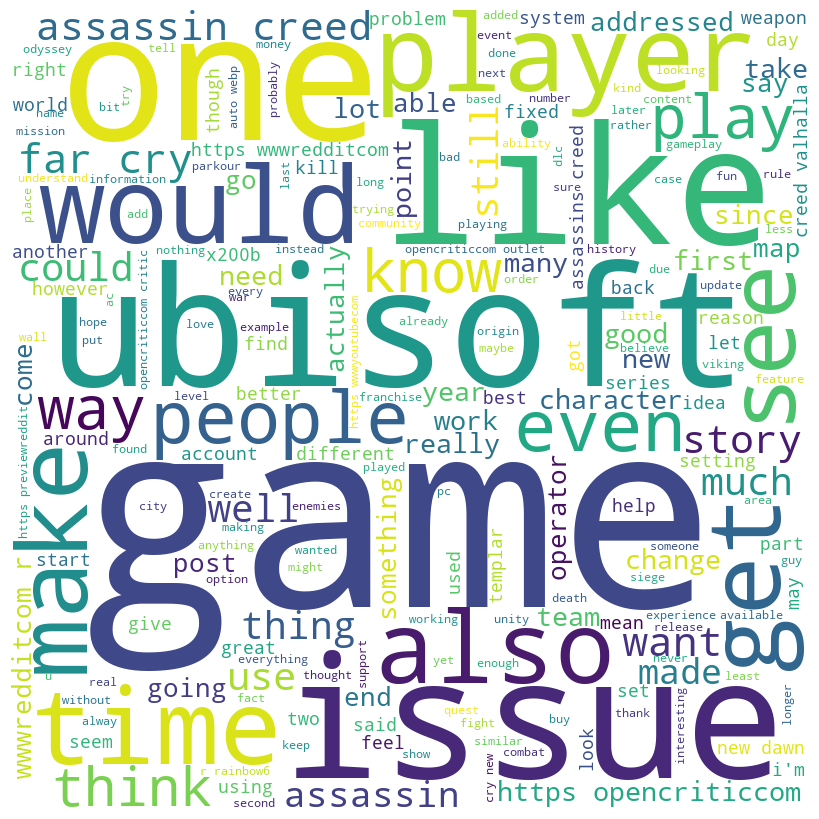

In [52]:
# word cloud 

# join all the text in the body column
text = ' '.join(engaging_submission_posts['body'])

# create a word cloud object
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words = 1000,
                contour_width = 3, 
                contour_color = 'steelblue',
                stopwords = set(stopwords.words('english')), 
                min_font_size = 10).generate(text)  

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# visuazlize the word cloud
wordcloud.to_file('wordcloud2_internal_matters.png')


C:\Users\school\AppData\Local\Temp\ipykernel_12936\1250752128.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_pos, y=counts, palette='husl')


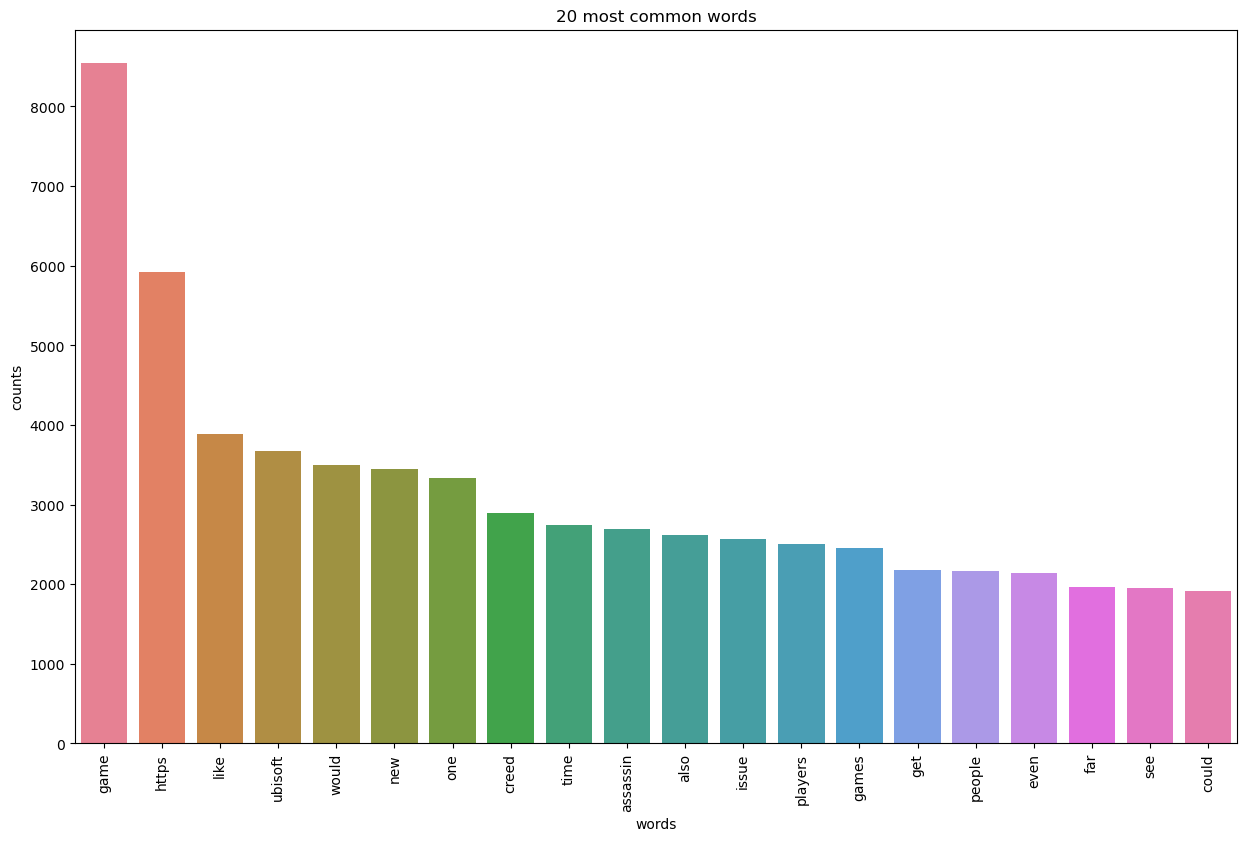

In [53]:
# Helper function
def plot_20_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts += t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x: x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='20 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x=x_pos, y=counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words=stopwords.words('english'))

# Fit and transform the processed body text
count_data = count_vectorizer.fit_transform(engaging_submission_posts['body'])

# Visualise the 20 most common words
plot_20_most_common_words(count_data, count_vectorizer)

In [54]:
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
issue addressed players fixed quest could issues would prevented various

Topic #1:
damage new gun enemies high moderate map fire guns al

Topic #2:
game creed https assassin like also see time origins one

Topic #3:
https game players system new siege community would team issues

Topic #4:
team https lang nbsp play pro league penta us fps

Topic #5:
https cry far opencriticcom new dawn review outlet critic 10

Topic #6:
creed assassin assassins would odyssey valhalla game story origins hans

Topic #7:
game like games one would ubisoft people even get time

Topic #8:
https operators game new year players siege use season pass

Topic #9:
ubisoft account https support game email get games even issue


In [55]:
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))

try:
    with open(LDAvis_data_filepath, 'rb') as f:
        LDAvis_prepared = pickle.load(f)
except FileNotFoundError:
    print(f"File not found: {LDAvis_data_filepath}. Preparing data instead.")
    LDAvis_prepared = pyLDAvis.lda_model.prepare(lda, count_data, count_vectorizer)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# Save the visualization as HTML
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.028847  0.114491       1        1  24.033862
5     -0.050241  0.183983       2        1  16.213798
4      0.051329  0.081619       3        1  11.873023
2      0.066037  0.047485       4        1  10.738945
8     -0.141638  0.016494       5        1   9.360436
0      0.133284 -0.070871       6        1   9.293746
9      0.127269 -0.023683       7        1   8.134183
7      0.114654 -0.154931       8        1   4.292396
3     -0.180899 -0.069792       9        1   3.940878
1     -0.148643 -0.124795      10        1   2.118732, topic_info=         Term        Freq       Total Category  logprob  loglift
592   account  955.000000  955.000000  Default  30.0000  30.0000
5174       pm  333.000000  333.000000  Default  29.0000  29.0000
56         11  244.000000  244.000000  Default  28.0000  28.0000
74         12  165.000000  165.000000  Default  27.0000  27.0000
7173      ubi  234.000000  234.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
762      also    7.251685  179.008190  Topic10  -5.4099   0.6482
3547     hope    6.185410   92.671927  Topic10  -5.5689   1.1475
3293     good    5.968385   92.680381  Topic10  -5.6047   1.1117
6604    still    5.898825  205.318337  Topic10  -5.6164   0.3045
7577     well    5.723287  124.121184  Topic10  -5.6466   0.7776

[739 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
3         4  0.891591  000059762
20        9  0.895701       0078
21        2  0.803617         01
21        5  0.178582         01
24        5  0.819721         03
...     ...       ...        ...
7734      5  0.093880      years
7734      6  0.043329      years
7734      7  0.050551      years
7734      8  0.072215      years
7752      4  0.837389       yule

[1820 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 5, 3, 9, 1, 10, 8, 4, 2])

# Part 4: Sentiment Analysis

In [ ]:
dict_tagged_sentences = ''
# Below indicates the relative path to
# positive/negative/inverter/incrementer/decrementer files
DICTIONARY_DIR_PREFIX = 'dicts2/'

In [ ]:
class Splitter(object):
    def __init__(self):
        self.nltk_splitter = nltk.data.load('tokenizers/punkt/english.pickle')
        self.nltk_tokenizer = nltk.tokenize.TreebankWordTokenizer()

    def split(self, text):
        """
        input format: a paragraph of text
        output format: a list of lists of words.
            e.g.: [['this', 'is', 'a', 'sentence'], ['this', 'is', 'another', 'one']]
        """
        sentences = self.nltk_splitter.tokenize(text)
        tokenized_sentences = [self.nltk_tokenizer.tokenize(sent) for sent in sentences]
        return tokenized_sentences


In [ ]:
class POSTagger(object):
    def __init__(self):
        pass

    def pos_tag(self, sentences):
        """
        input format: list of lists of words
            e.g.: [['this', 'is', 'a', 'sentence'], ['this', 'is', 'another', 'one']]
        output format: list of lists of tagged tokens. Each tagged tokens has a
        form, a lemma, and a list of tags
            e.g: [[('this', 'this', ['DT']), ('is', 'be', ['VB']), ('a', 'a', ['DT']), ('sentence', 'sentence', ['NN'])],
                    [('this', 'this', ['DT']), ('is', 'be', ['VB']), ('another', 'another', ['DT']), ('one', 'one', ['CARD'])]]
        """

        pos = [nltk.pos_tag(sentence) for sentence in sentences]
        #adapt format
        pos = [[(word, word, [postag]) for (word, postag) in sentence] for sentence in pos]
        return pos


In [ ]:
class DictionaryTagger(object):
    def __init__(self, dictionary_paths):
        """

        :rtype : object
        """
        files = [open(path, 'r') for path in dictionary_paths]
        dictionaries = [yaml.full_load(dict_file) for dict_file in files]
        map(lambda x: x.close(), files)
        self.dictionary = {}
        self.max_key_size = 0
        for curr_dict in dictionaries:
            for key in curr_dict:
                if key in self.dictionary:
                    self.dictionary[key].extend(curr_dict[key])
                else:
                    self.dictionary[key] = curr_dict[key]
                    self.max_key_size = max(self.max_key_size, len(key))

    def tag(self, postagged_sentences):
        return [self.tag_sentence(sentence) for sentence in postagged_sentences]

    def tag_sentence(self, sentence, tag_with_lemmas=False):
        """
        the result is only one tagging of all the possible ones.
        The resulting tagging is determined by these two priority rules:
            - longest matches have higher priority
            - search is made from left to right
        """
        tag_sentence = []
        N = len(sentence)
        if self.max_key_size == 0:
            self.max_key_size = N
        i = 0
        while (i < N):
            j = min(i + self.max_key_size, N) #avoid overflow
            tagged = False
            while (j > i):
                expression_form = ' '.join([word[0] for word in sentence[i:j]]).lower()
                expression_lemma = ' '.join([word[1] for word in sentence[i:j]]).lower()
                if tag_with_lemmas:
                    literal = expression_lemma
                else:
                    literal = expression_form
                if literal in self.dictionary:
                    #self.logger.debug("found: %s" % literal)
                    is_single_token = j - i == 1
                    original_position = i
                    i = j
                    taggings = [tag for tag in self.dictionary[literal]]
                    tagged_expression = (expression_form, expression_lemma, taggings)
                    if is_single_token: #if the tagged literal is a single token, conserve its previous taggings:
                        original_token_tagging = sentence[original_position][2]
                        tagged_expression[2].extend(original_token_tagging)
                    tag_sentence.append(tagged_expression)
                    tagged = True
                else:
                    j = j - 1
            if not tagged:
                tag_sentence.append(sentence[i])
                i += 1
        return tag_sentence

In [ ]:
def value_of(sentiment):
    if sentiment == 'positive1': return 1
    if sentiment == 'positive2': return 2
    if sentiment == 'positive3': return 3
    if sentiment == 'negative1': return -1
    if sentiment == 'negative2': return -2
    if sentiment == 'negative3': return -3
    return 0

def sentiment_score(review):
    return sum ([value_of(tag) for sentence in dict_tagged_sentences for token in sentence for tag in token[2]])

def sentence_score(sentence_tokens, previous_token, acum_score):
    if not sentence_tokens:
        return acum_score
    else:
        current_token = sentence_tokens[0]
        tags = current_token[2]
        token_score = sum([value_of(tag) for tag in tags])
        if previous_token is not None:
            previous_tags = previous_token[2]
            if 'inc' in previous_tags:
                token_score *= 2.0
            elif 'dec' in previous_tags:
                token_score /= 2.0
            elif 'inv' in previous_tags:
                token_score *= -1.0
        return sentence_score(sentence_tokens[1:], current_token, acum_score + token_score)

def sentiment_score(sentences):
    return sum([sentence_score(sentence, None, 0.0) for sentence in sentences])

In [ ]:
def run_analysis(text):
    splitter = Splitter() # Split a long single string into sentences.
    postagger = POSTagger() # Part-Of-Speech tagger.

    # If text contains multiple sentences, this line splits it into individual sentences.
    splitted_sentences = splitter.split(text)
    print (splitted_sentences)
    #exit(1)

    print ("########## This performs Part-Of-Speech tagging. ##########")
    # This performs Part-Of-Speech tagging.
    pos_tagged_sentences = postagger.pos_tag(splitted_sentences)
    pprint (pos_tagged_sentences)
    #exit(1)

    print ("########## This line loads Positive word and Negative word corpus. ##########")
    # This line loads Positive word and Negative word dictionaries.
    dicttagger = DictionaryTagger([ DICTIONARY_DIR_PREFIX + 'positive.yml', DICTIONARY_DIR_PREFIX + 'negative.yml'])
    dict_tagged_sentences = dicttagger.tag(pos_tagged_sentences)
    pprint(dict_tagged_sentences)
    #exit(1)

    print ("########## [Baseline Analysis] Using only Positive/Negative corpus. ##########")
    score = sentiment_score(dict_tagged_sentences)
    print ("Score: %d" % score)
    #exit(1)

    print ("########## This line loads Positve/Negative corpus + incrementer/decrementer corpus. ##########")
    dicttagger = DictionaryTagger([ DICTIONARY_DIR_PREFIX + 'positive.yml', DICTIONARY_DIR_PREFIX + 'negative.yml', DICTIONARY_DIR_PREFIX + 'inc.yml', DICTIONARY_DIR_PREFIX + 'dec.yml'])
    dict_tagged_sentences = dicttagger.tag(pos_tagged_sentences)
    pprint(dict_tagged_sentences)
    score = sentiment_score(dict_tagged_sentences)
    print ("Score: %d" % score)
    #exit(1)
